# Heatmaps 2

## Scattering efficiency as a function of wavelength and refractive index

In [2]:
from scipy.special import riccati_jn, riccati_yn
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Refractive Index')

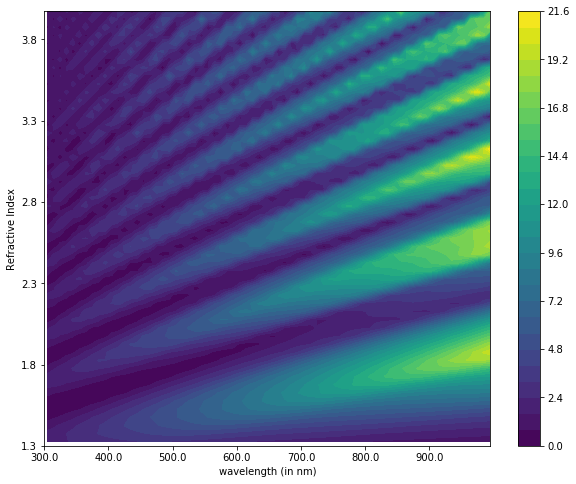

In [17]:
def riccati_1(o,y):
    n1,n1p = riccati_jn(o,y)
    return n1[o],n1p[o]

def riccati_2(o,y):
    n2,n2p = riccati_jn(o,y) 
    n3,n3p = riccati_yn(o,y)
    n4 = n2[o]+1j*n3[o]
    n4p = n2p[o]+1j*n3p[o]
    return n4,n4p


#N1 = 3.5 #refractive index of particle
#N = 1   #refractive index of medium
#m = N1/N   #relative refractive index

a = 200e-9  #radius of the particle/scatterer

n_max = 4
n_min = 1.3
step1 = 0.05
num1 = (n_max-n_min)/step1
num1 = round(num1) 
RI = np.linspace(n_min,n_max,num1) 

G =  np.pi*a*a

wvl_max = 1000e-9
wvl_min = 300e-9
step2 = 10e-9 #inteval of 5nm
num2 = (wvl_max-wvl_min)/step2
num2 = round(num2) 
wavelength = np.linspace(wvl_min,wvl_max,num2)  

max_order = 3
a_n = np.zeros((num1,num2,max_order),dtype=np.complex)
b_n = np.zeros((num1,num2,max_order),dtype=np.complex)
a_n_amp = np.zeros((num1,num2,max_order))
b_n_amp = np.zeros((num1,num2,max_order))

for i in range(num1): 
    for n in range(max_order):
        for j in range(num2):
            #x = (2*np.pi*N*a)/wavelength[j]
            x = (2*np.pi*RI[i]*a)/wavelength[j]
            #we define 6 constants to make the final expressions simpler
            m = RI[i]
            c1,c2= riccati_1(n,m*x)
            c3,c4= riccati_1(n,x)
            c5,c6 = riccati_2(n,x)

            #evaluate the final Mie coeffients a_n and b_n
            a_n[i,j,n] = (m*c1*c4 - c3*c2)/(m*c1*c6 - c5*c2)
            b_n[i,j,n] = (c1*c4 - m*c3*c2)/(c1*c6 - m*c5*c2)

            a_n_amp[i,j,n] = abs(a_n[i,j,n])
            b_n_amp[i,j,n] = abs(b_n[i,j,n])

#scattering cross section
Qsc = np.zeros((num1,num2)) #scattering cross section
Qsc2 = np.zeros((num1,num2)) #scattering efficiency (normalised cross section)
k = np.ones(num2)

for i in range(num1):
    for j in range(num2):
        Qsc[i,j] = 0
        k[j] = 2*np.pi/wavelength[j]
        for n in range(max_order):
                Qsc[i,j] = Qsc[i,j] + ((2*n)+1)*(a_n_amp[i,j,n]**2 +b_n_amp[i,j,n]**2)
        Qsc[i,j] = Qsc[i,j]*(2*np.pi/(k[j])**2)
        Qsc2[i,j] = Qsc[i,j]/G

plt.figure(figsize=(10,8))
plt.contourf(Qsc2,origin='lower',levels=30)
plt.colorbar()
plt.xticks(np.arange(0,num2,step=10),np.arange(wvl_min*1e9,wvl_max*1e9,step=10*step2*1e9))
plt.xlabel('wavelength (in nm)')
plt.yticks(np.arange(0,num1,step=10),np.arange(n_min,n_max,step=10*step1))
plt.ylabel('Refractive Index')

### Scattering efficiency of a dielectric particle (radius = 200nm) plotted as a function of Wavelength and Refractive index. Upto 2 orders of electric and magnetic multipoles are considered

_______________________________________________________________________________________________________________________

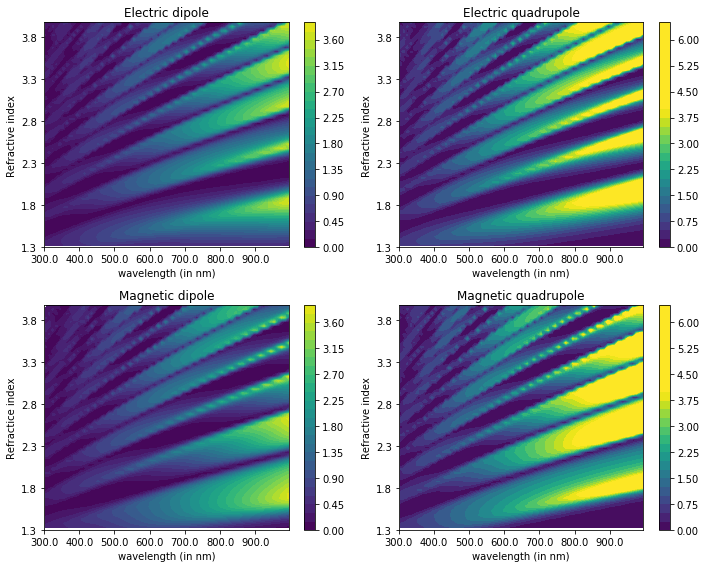

In [18]:
Qsc_E_1 = np.zeros((num1,num2)) #scattering efficiency of electric dipole
Qsc_E_2 = np.zeros((num1,num2)) #scattering effifiencu of electric quadrupole
Qsc_M_1 = np.zeros((num1,num2)) #scattering efficiency of magnetic dipole
Qsc_M_2 = np.zeros((num1,num2)) #scattering effifiency of magnetic quadrupole
k = np.ones(num2)

for i in range(num1):
    for j in range(num2):
        k[j] = 2*np.pi/wavelength[j]
        Qsc_E_1[i,j] = ((2*np.pi/(k[j])**2)*(a_n_amp[i,j,1]**2)*3)/G
        Qsc_E_2[i,j] = ((2*np.pi/(k[j])**2)*(a_n_amp[i,j,2]**2)*5)/G
        Qsc_M_1[i,j] = ((2*np.pi/(k[j])**2)*(b_n_amp[i,j,1]**2)*3)/G
        Qsc_M_2[i,j] = ((2*np.pi/(k[j])**2)*(b_n_amp[i,j,2]**2)*5)/G
        
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.contourf(Qsc_E_1,origin='lower',levels=30)
plt.colorbar()
plt.clim(0,4)
plt.xticks(np.arange(0,num2,step=10),np.arange(wvl_min*1e9,wvl_max*1e9,step=10*step2*1e9))
plt.xlabel('wavelength (in nm)')
plt.yticks(np.arange(0,num1,step=10),np.arange(n_min,n_max,step=10*step1))
plt.ylabel('Refractive index')
plt.title('Electric dipole')

plt.subplot(2,2,2)
plt.contourf(Qsc_E_2,origin='lower',levels=30)
plt.colorbar()
plt.clim(0,4)
plt.xticks(np.arange(0,num2,step=10),np.arange(wvl_min*1e9,wvl_max*1e9,step=10*step2*1e9))
plt.xlabel('wavelength (in nm)')
plt.yticks(np.arange(0,num1,step=10),np.arange(n_min,n_max,step=10*step1))
plt.ylabel('Refractive index')
plt.title('Electric quadrupole')

plt.subplot(2,2,3)
plt.contourf(Qsc_M_1,origin='lower',levels=30)
plt.colorbar()
plt.clim(0,4)
plt.xticks(np.arange(0,num2,step=10),np.arange(wvl_min*1e9,wvl_max*1e9,step=10*step2*1e9))
plt.xlabel('wavelength (in nm)')
plt.yticks(np.arange(0,num1,step=10),np.arange(n_min,n_max,step=10*step1))
plt.ylabel('Refractice index')
plt.title('Magnetic dipole')

plt.subplot(2,2,4)
plt.contourf(Qsc_M_2,origin='lower',levels=30)
plt.colorbar()
plt.clim(0,4)
plt.xticks(np.arange(0,num2,step=10),np.arange(wvl_min*1e9,wvl_max*1e9,step=10*step2*1e9))
plt.xlabel('wavelength (in nm)')
plt.yticks(np.arange(0,num1,step=10),np.arange(n_min,n_max,step=10*step1))
plt.ylabel('Refractive index')
plt.title('Magnetic quadrupole')

plt.tight_layout()